In [1]:
import sys
import time
import os.path
from glob import glob
from datetime import datetime, timedelta

# data tools
import h5py
import numpy as np
import numba as nb
import pandas as pd

In [2]:
# custom tools
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/utils/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/')
sys.path.insert(0, '/glade/u/home/ksha/WORKSPACE/Analog_BC/utils/')

import analog_utils as ana
import data_utils as du
import graph_utils as gu

from namelist import *

In [3]:
# graph tools
import cmaps
import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [4]:
need_publish = False

# True: publication quality figures
# False: low resolution figures in the notebook

if need_publish:
    dpi_ = fig_keys['dpi']
else:
    dpi_ = 75

In [5]:
# importing domain information
with h5py.File(save_dir+'BC_domain_info.hdf', 'r') as h5io:
    base_lon = h5io['base_lon'][...]
    base_lat = h5io['base_lat'][...]
    etopo_025 = h5io['etopo_base'][...]
    land_mask = h5io['land_mask_base'][...]
    land_mask_bc = h5io['land_mask_bc'][...]
    
with h5py.File(save_dir+'NA_SL_info.hdf', 'r') as h5io:
    facet_h = h5io['facet_h'][...]
    facet_m = h5io['facet_m'][...]
    facet_l = h5io['facet_l'][...]
    W_facet = h5io['W_facet'][...]

In [6]:
cmap_facet = plt.cm.magma

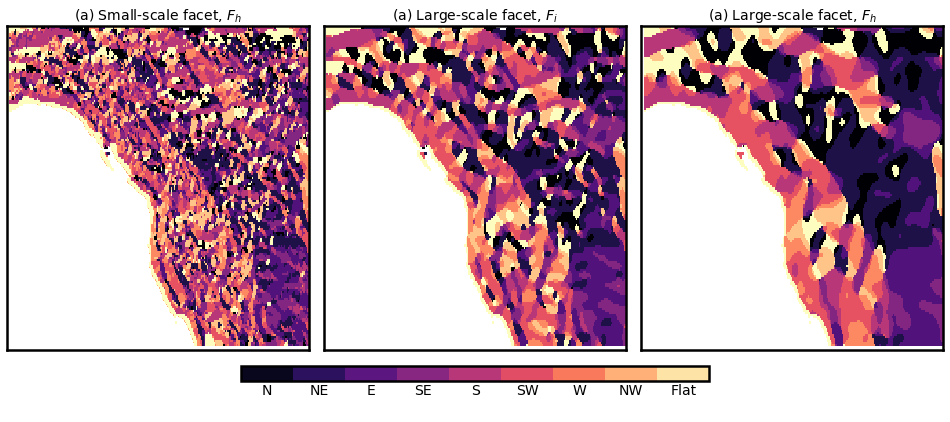

In [7]:
fig = plt.figure(figsize=(13, 4.5))
gs = gridspec.GridSpec(1, 3, height_ratios=[1], width_ratios=[1, 1, 1])
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])
ax3 = plt.subplot(gs[0, 2])
plt.subplots_adjust(0, 0, 1, 1, hspace=0, wspace=0.05)

AX = [ax1, ax2, ax3]
for ax in AX:
    ax = gu.ax_decorate_box(ax)

CS = ax1.contourf(base_lon, base_lat, facet_h, np.arange(10), cmap=cmap_facet)
ax1.pcolormesh(base_lon, base_lat, facet_h, cmap=cmap_facet)
ax2.pcolormesh(base_lon, base_lat, facet_m, cmap=cmap_facet)
ax3.pcolormesh(base_lon, base_lat, facet_l, cmap=cmap_facet)

ax_base = fig.add_axes([0.25, -0.2, 0.5, 0.15])
[j.set_linewidth(0) for j in ax_base.spines.values()]
ax_base.tick_params(axis='both', left=False, top=False, right=False, bottom=False, \
                    labelleft=False, labeltop=False, labelright=False, labelbottom=False)
cax = inset_axes(ax_base, height='30%', width='100%', borderpad=0, loc=2)
CBar = plt.colorbar(CS, orientation='horizontal', cax=cax,)
CBar.ax.tick_params(axis='x', labelsize=14, direction='in', length=0)

labels = np.arange(0, 9, 1)
loc = labels + .5
CBar.set_ticks(loc)
CBar.set_ticklabels(["N", "NE", "E", "SE", "S", "SW", "W", "NW", "Flat"])

ax1.set_title('(a) Small-scale facet, $F_h$', fontsize=14)
ax2.set_title('(a) Large-scale facet, $F_i$', fontsize=14)
ax3.set_title('(a) Large-scale facet, $F_h$', fontsize=14)

#CBar.set_label('Directions', fontsize=14)
CBar.outline.set_linewidth(2.5)

if need_publish:
    # Save figure
    fig.savefig(fig_dir+'Facet.png', format='png', **fig_keys)